# Normalizando Dados
## importando bibliotecas e lendo arquivo proncipal 1418 linas

In [84]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


data = pd.read_csv('imovel_limpo.csv')


In [85]:
dados = pd.DataFrame({
    'titulo': list(data.get('Titulo do imóvel')),
    'preco': list(data.get('Preço')),
    'quartos': list(data.get('Quartos')),
    'area': list(data.get('Área do imóvel')),
})
print('total:',len(dados))
dados = dados.dropna()
print('-nulos:',len(dados))

# --- Limpeza dos dados numéricos ---
dados['area'] = (
    dados['area']
    .astype(str)
    .str.replace('m²', '', regex=False)
    .str.replace(' ', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)
dados['preco'] = (
    dados['preco']
    .astype(str)
    .str.replace('R$', '', regex=False)
    .str.replace(' ', '', regex=False)
    .str.replace(',00', '', regex=False)
    .str.replace('.', '', regex=False)
    .astype(float)
)
dados.to_csv('polidos.csv')


total: 1417
-nulos: 1281


In [86]:
X = dados[['quartos', 'area']]
y = dados['preco']

In [87]:
colunas_numericas = ['quartos', 'area']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# --- Cria e treina o modelo ---
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [89]:
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

Coeficientes: [-974.31036253    0.98800288]
Intercepto: 15343.509228503193


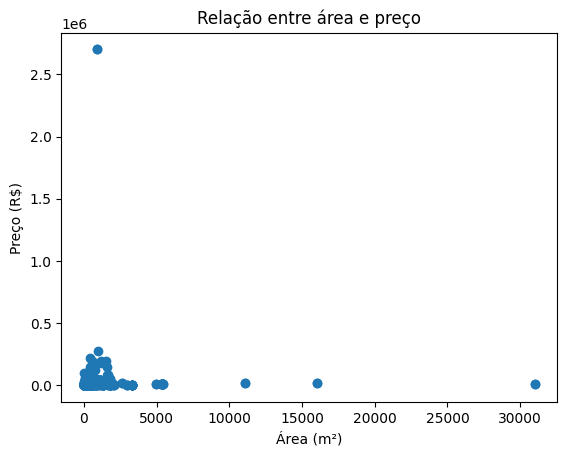

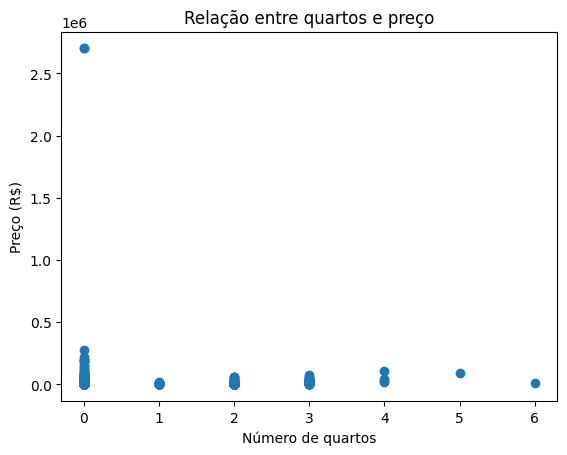

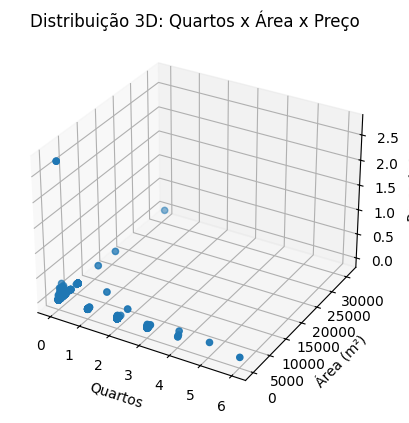

In [90]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def gerarGraficos(dados):
    plt.scatter(dados['area'], dados['preco'])
    plt.xlabel('Área (m²)')
    plt.ylabel('Preço (R$)')
    plt.title('Relação entre área e preço')
    plt.show()

    plt.scatter(dados['quartos'], dados['preco'])
    plt.xlabel('Número de quartos')
    plt.ylabel('Preço (R$)')
    plt.title('Relação entre quartos e preço')
    plt.show()


    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dados['quartos'], dados['area'], dados['preco'])
    ax.set_xlabel('Quartos')
    ax.set_ylabel('Área (m²)')
    ax.set_zlabel('Preço (R$)')
    plt.title('Distribuição 3D: Quartos x Área x Preço')
    plt.show()


gerarGraficos(dados)

# retirada dos 0s

In [91]:
dados = dados[(dados['quartos'] != 0) & (dados['area'] != 0) & (dados['preco'] != 0)]
print('-0s:', len(dados))


-0s: 277


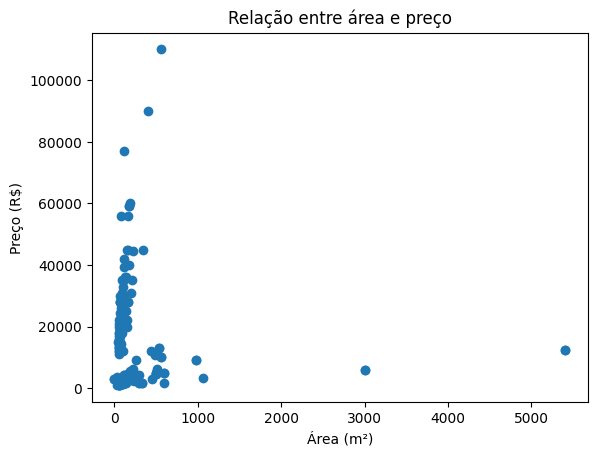

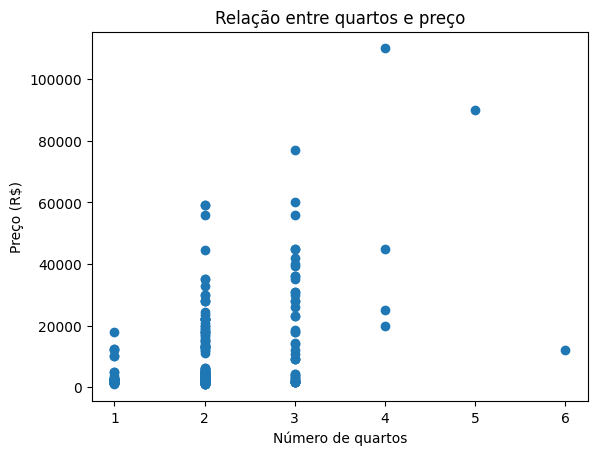

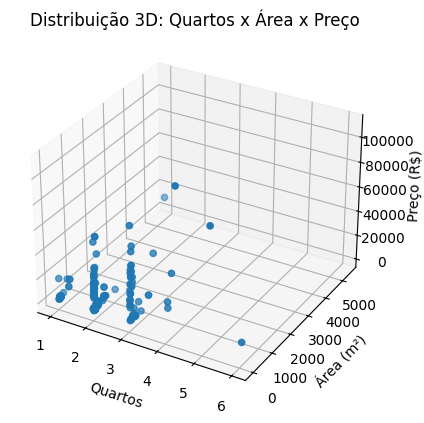

In [92]:

gerarGraficos(dados)

In [93]:
def treinar(dados):
    X = dados[['quartos', 'area']]
    y = dados['preco']

    colunas_numericas = ['quartos', 'area']


    # --- Divide treino/teste ---
    X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

    # --- Cria e treina o modelo ---
    modelo = LinearRegression()
    modelo.fit(X_treino, y_treino)

    # --- Resultados ---
    print("Coeficientes:", modelo.coef_)
    print("Intercepto:", modelo.intercept_)
    # print("Score R² no teste:", modelo.score(preprocessador.transform(X_teste), y_teste))
        
    # --- Predição de um novo imóvel ---
    novo = pd.DataFrame({
        'quartos': [int(quart:=input('Quantos Quartos?'))],
        'area': [int(tam:=input('Tamanho em metros quadrados'))],
    })

    preco_previsto = modelo.predict(novo)
    print(f"Preço estimado para imovel com {quart} quartos e {tam} m2: R$", "{:.2f}".format(preco_previsto[0]))

    dados.to_csv('faltaltilayers.csv')
treinar(dados)

Coeficientes: [9.84067971e+03 1.72354289e+00]
Intercepto: -10479.875710850301
Preço estimado para imovel com 3 quartos e 45 m2: R$ 19119.72


# Valores reduzidos

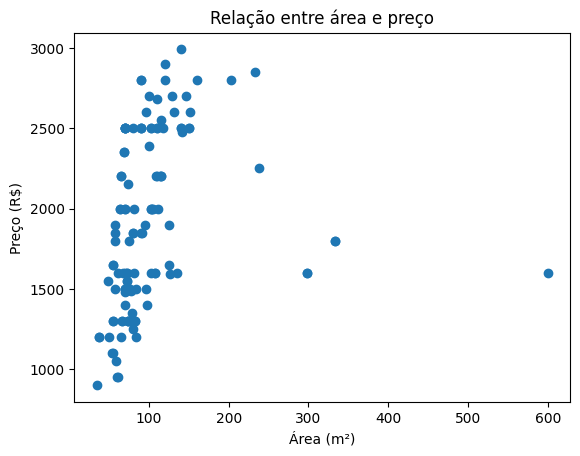

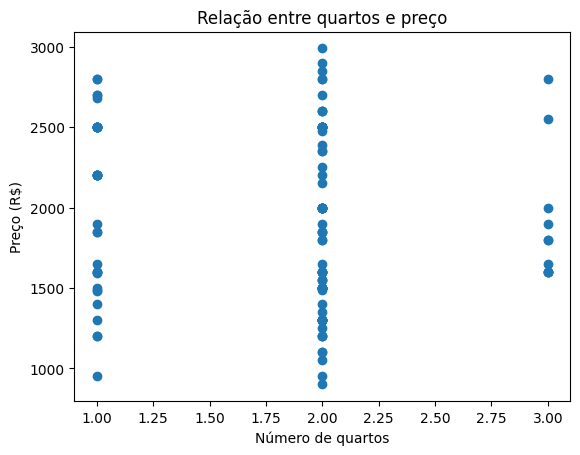

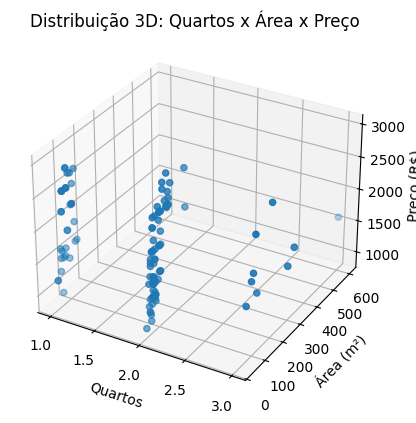

In [94]:
dados = dados[dados['preco'] < 3000]
len(dados)
gerarGraficos(dados)

In [95]:
treinar(dados)

Coeficientes: [-204.53620529    2.64991369]
Intercepto: 2017.198828098586
Preço estimado para imovel com 3 quartos e 45 m2: R$ 1522.84
